# Neural Networks in Keras
The examples in this notebook assume that you are familiar with the theory of the neural networks. To learn more about the neural networks, you can refer resources in the readme file.

In this notebook, we will learn to:
* import MNIST dataset and visualize some example images
* define a neural network model with a single hidden layer
* train the model and plot the accuracy or loss at each epoch
* study the effect of varying the learning rate, batch size and number of epochs
* use SGD and Adam optimizers
* CPU vs GPU speed
* save model and weights every 5 epochs 
* resume training by loading a saved model
* earlystop the training if there is negligiable improvement in the performance

## Import modules

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
% matplotlib inline
np.random.seed(2017)  

Using Theano backend.


## Load MNIST dataset

In [2]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print "Number of training samples: %d"%train_features.shape[0]
print "Number of test samples: %d"%test_features.shape[0]
print "Image rows: %d"%train_features.shape[1]
print "Image columns: %d"%train_features.shape[2]
print "Number of classes: %d"%num_classes

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


## Show Examples from Each Class

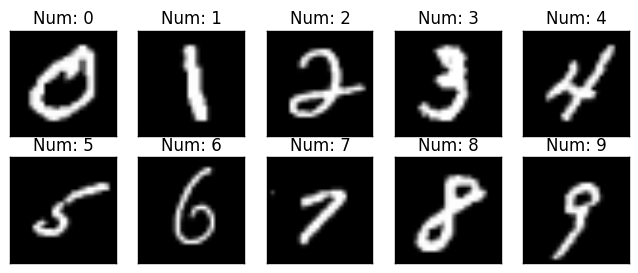

In [3]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

## Pre-processing

In [4]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Define a Neural Network Model with a Single Hidden Layer

In [6]:
def simple_nn():
    # Initialize model
    model = Sequential()
    # Add an input layer and a hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))
    # Add activation layer to add non-linearity
    model.add(Activation('sigmoid'))
    # To add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # Add output layer
    model.add(Dense(num_classes))
    # Add softmax layer 
    model.add(Activation('softmax'))
    return model

In [7]:
model = simple_nn()
# define optimizer, loss function
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Print model information
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 100)           78500       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 100)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1010        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_____________________

## Train the model

In [8]:
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)
end = time.time()
print "Model took %0.2f seconds to train"%(end - start)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
1s - loss: 0.0896 - acc: 0.2103 - val_loss: 0.0830 - val_acc: 0.3227
Epoch 2/10
1s - loss: 0.0779 - acc: 0.3908 - val_loss: 0.0732 - val_acc: 0.4453
Epoch 3/10
1s - loss: 0.0695 - acc: 0.4903 - val_loss: 0.0654 - val_acc: 0.5388
Epoch 4/10
1s - loss: 0.0625 - acc: 0.5668 - val_loss: 0.0589 - val_acc: 0.6121
Epoch 5/10
1s - loss: 0.0564 - acc: 0.6426 - val_loss: 0.0529 - val_acc: 0.6862
Epoch 6/10
1s - loss: 0.0511 - acc: 0.6976 - val_loss: 0.0479 - val_acc: 0.7260
Epoch 7/10
1s - loss: 0.0466 - acc: 0.7297 - val_loss: 0.0438 - val_acc: 0.7501
Epoch 8/10
1s - loss: 0.0431 - acc: 0.7507 - val_loss: 0.0407 - val_acc: 0.7672
Epoch 9/10
1s - loss: 0.0403 - acc: 0.7655 - val_loss: 0.0382 - val_acc: 0.7806
Epoch 10/10
1s - loss: 0.0379 - acc: 0.7779 - val_loss: 0.0361 - val_acc: 0.7885
Model took 16.21 seconds to train


## Plot Accuracy or Loss as a Function of Number of Epoch

In [9]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

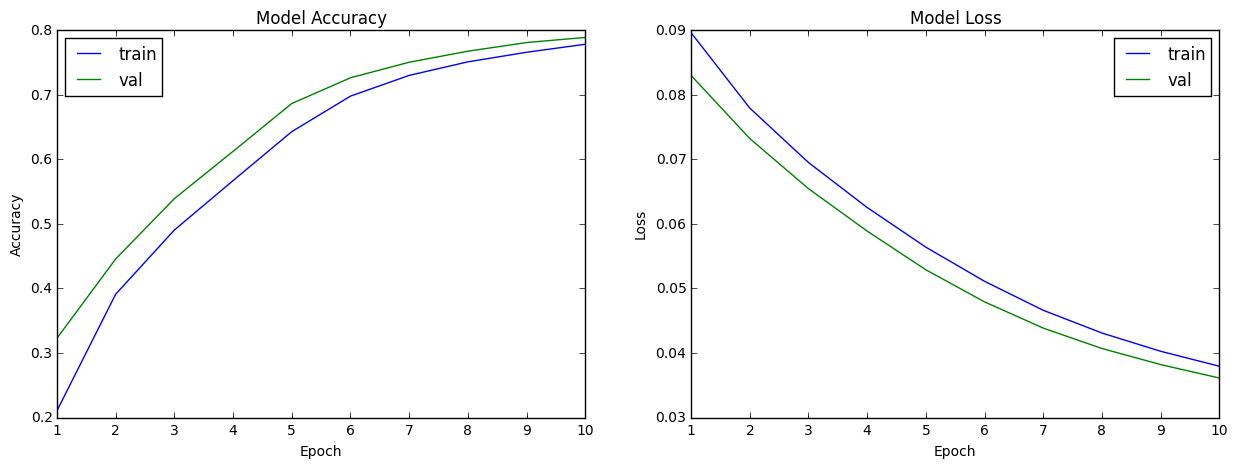

In [10]:
plot_model_history(model_info)

## Test the Model

In [11]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [12]:
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

Accuracy on test data is: 78.87


## Observation:
Both training and validation accuracy increase as the number of epochs increase. More information is learned in each epoch.

## Vary the Learning Rate

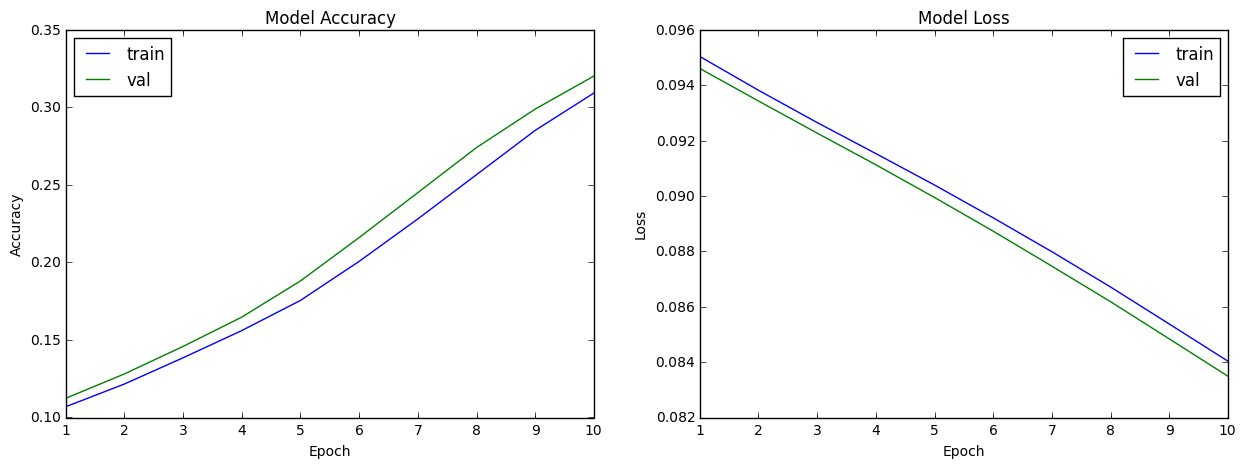

Model took 18.33 seconds to train
Accuracy on test data is: 33.26


In [13]:
# Decrease the learning rate
# Define model
model = simple_nn()
# define optimizer, loss function
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

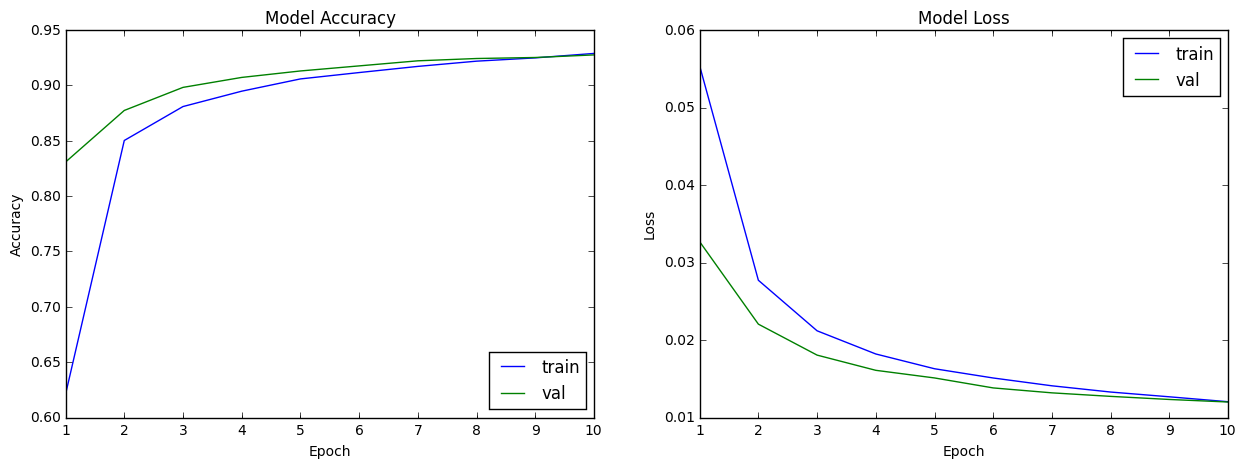

Model took 17.09 seconds to train
Accuracy on test data is: 92.79


In [14]:
# Increase the learning rate
# Define model
model = simple_nn()
# define optimizer, loss function
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation:
If the learning rate is decreased, less information is learned in each epoch and more epochs are required to learn a good model. If the learning rate is increased, more information is learned in each epoch and less epochs are required to learn a good model. When using SGD, learning rate needs to be decided emperically for a given dataset. 

## Use Adam optimizer instead of SGD

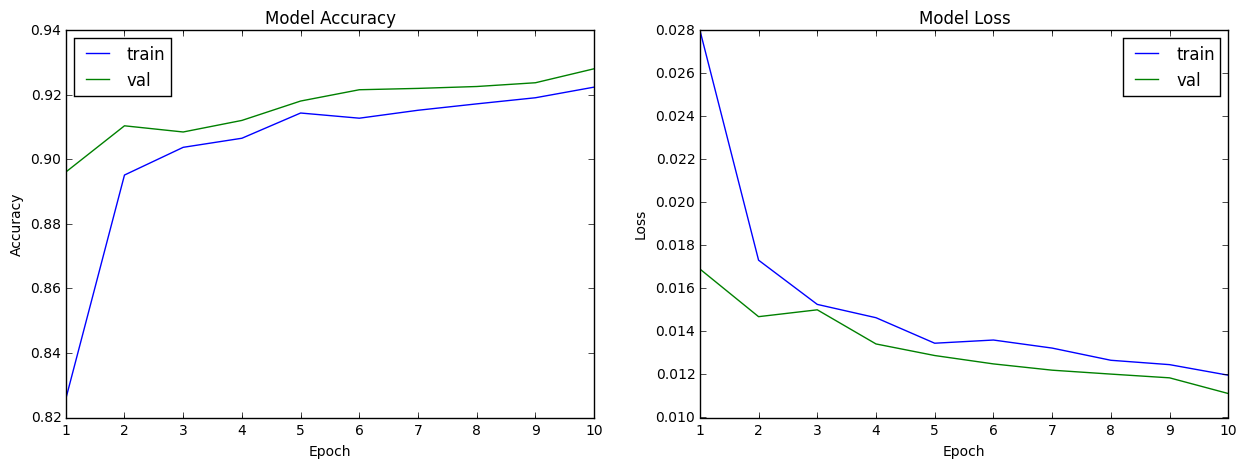

Model took 33.59 seconds to train
Accuracy on test data is: 92.55


In [15]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation:
Using Adam optimizer, we don't need to specify a learning rate. However, the training time increases. Refer [this tutorial](http://sebastianruder.com/optimizing-gradient-descent/) for an interesting comparison of optimizers.

## Vary the Batch Size

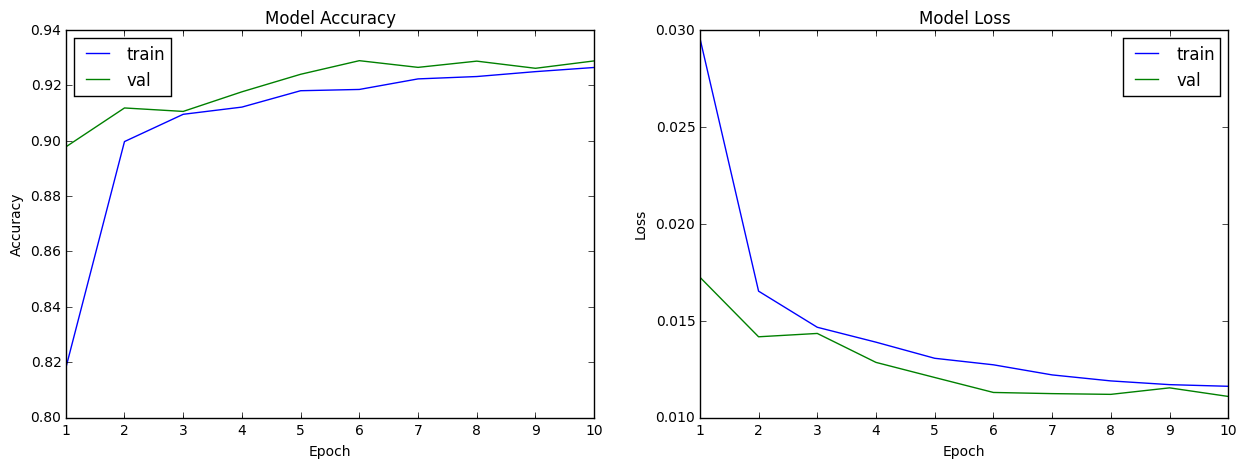

Model took 23.53 seconds to train
Accuracy on test data is: 92.75


In [16]:
# Increase the batch size
# Define model
model = simple_nn()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

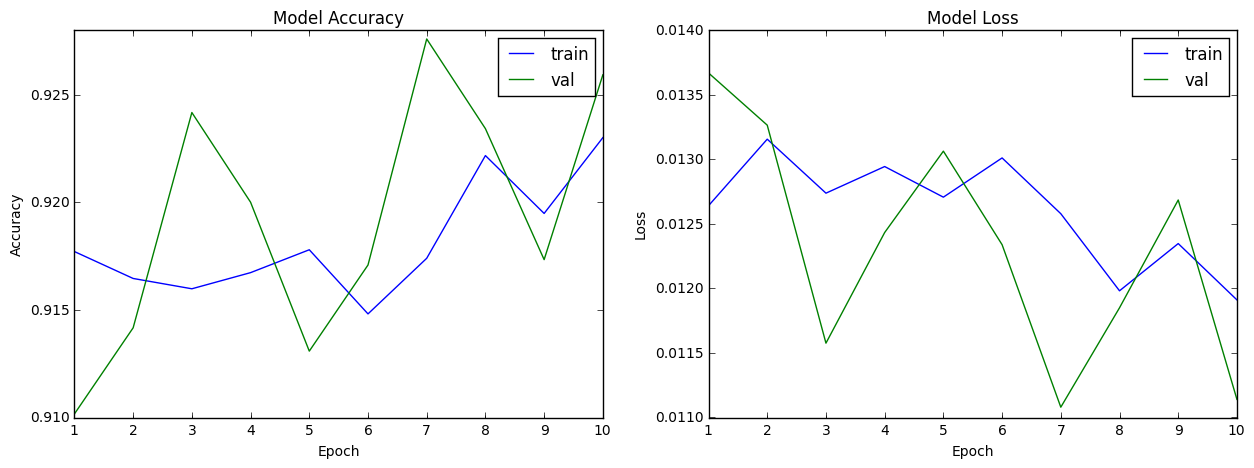

Model took 65.94 seconds to train
Accuracy on test data is: 92.85


In [17]:
# Decrease the batch size
# Define model
model = simple_nn()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=32, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation:
Increasing the batch size decreases the training time but reduces the rate of learning.

## Change the Cost Function to Categorical Crossentropy

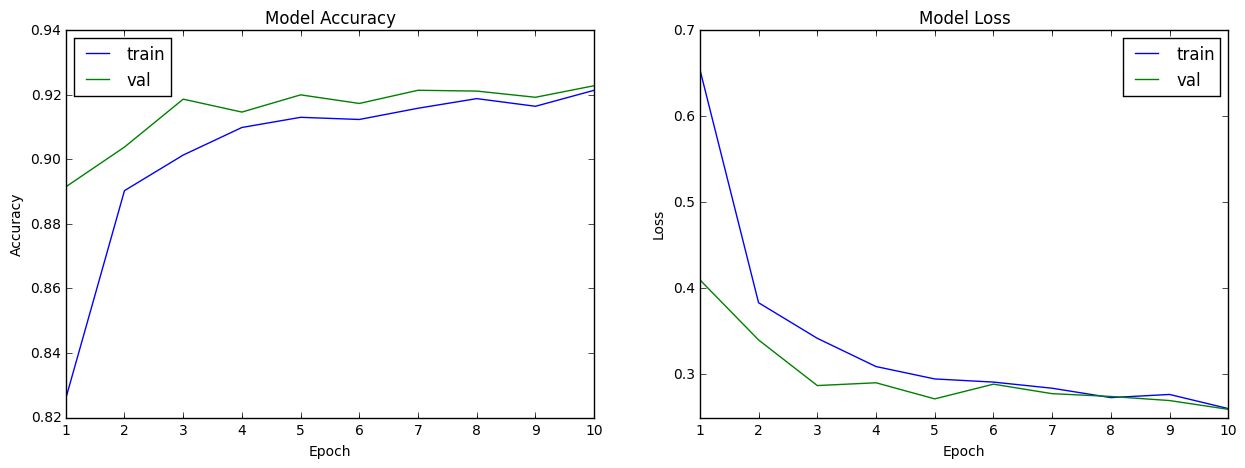

Model took 31.24 seconds to train
Accuracy on test data is: 92.46


In [18]:
# Define model
model = simple_nn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation: 
Changing the cost function to categorical crossentropy reduced the training time. The decrease in training time significant when using SGD for this experiment. 

## Increase the Number of Epochs

In [ ]:
# Define model
model = simple_nn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, nb_epoch=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation:
As the number of epochs increase, more information is learned. The training as well as validation accuracy increases and then reaches a saturation.

## Deep Neural Network

In [ ]:
def deep_nn():
    # Define a deep neural network
    model = Sequential()
    model.add(Dense(512, input_dim=num_input_nodes))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [ ]:
model = deep_nn()
# decrease the batch size
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, nb_epoch=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation: 
By adding more hidden layers, training time as well as information learned in each epoch increases. It helps to improve the performance for complex tasks but may not help significantly for relatively simple datasets such as MNIST.

## Use GPU for the above network

In [ ]:
from keras import backend as K
if K.backend() =='theano':
    import os
    os.environ["THEANO_FLAGS"] = "mode=FAST_RUN, device=gpu, floatX=float32"

In [ ]:
# Define a deep neural network
model = deep_nn()
# decrease the batch size
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, nb_epoch=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation: 
Using GPU, speeds up the network training (as expected!)

## Save model every 5th epoch

In [ ]:
from keras.callbacks import ModelCheckpoint
import os

# Define a deep neural network
model = deep_nn()

# decrease the batch size
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, save_weights_only=True, mode='auto', period=5)
callbacks_list = [checkpoint]
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, nb_epoch=80, callbacks=callbacks_list, verbose=0, validation_split=0.2)
end = time.time()

## Resume training by loading a saved model

In [ ]:
# load weights
import os, glob
epoch_num = 79
outputFolder = './output-mnist'
file_ini = outputFolder+'/weights-'+ str(epoch_num)+'*'
filename =  glob.glob(file_ini)
print filename

model = deep_nn()
# decrease the batch size
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

if os.path.isfile(filename[0]):
    model.load_weights(filename[0])
else:
    print("no such file")

# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=False, save_weights_only=True,\
                             mode='auto', period=5)
callbacks_list = [checkpoint]
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2, initial_epoch = epoch_num+1)
end = time.time()


## Early Stopping

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = deep_nn()
# decrease the batch size
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=0, verbose=1, mode='auto')
callbacks_list = [earlystop]
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, callbacks=callbacks_list, verbose=2, \
                       validation_split=0.2)
end = time.time()